<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week06/6_20_CodeAlong_Bias_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Goal :** The goal of dataset is to predict the price of house based on give features. 

In [ ]:
# Import mandatory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')

#Load Data

In [ ]:
# load the dataset, you can assume this data is already cleaned.
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR33clYD7L7KarKwDrJr1GzW7GQRbTIzITBBHA7J-luNwIJylRrQR74p_k6AHJE-OfI5y3L2KmFIWo7/pub?output=csv'
df = pd.read_csv(path)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#Checking about information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

#Checking for duplicates and if found duplicates then we will delete the duplicates

In [ ]:
df.duplicated().sum()

5

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# the 'zipcode' column is a nominal categorical variable.
# convert the datatype of 'zipcode' to 'object'

df['zipcode'] = df['zipcode'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21608 non-null  int64  
 1   bedrooms       21608 non-null  int64  
 2   bathrooms      21608 non-null  float64
 3   sqft_living    21608 non-null  int64  
 4   sqft_lot       21608 non-null  int64  
 5   floors         21608 non-null  float64
 6   waterfront     21608 non-null  int64  
 7   view           21608 non-null  int64  
 8   condition      21608 non-null  int64  
 9   grade          21608 non-null  int64  
 10  sqft_above     21608 non-null  int64  
 11  sqft_basement  21608 non-null  int64  
 12  yr_built       21608 non-null  int64  
 13  yr_renovated   21608 non-null  int64  
 14  zipcode        21608 non-null  object 
 15  lat            21608 non-null  float64
 16  long           21608 non-null  float64
 17  sqft_living15  21608 non-null  int64  
 18  sqft_l

Split data into target vector and features matrix.

In [ ]:
# assign X and y
# price is the target

X = df.drop(columns='price')
y = df['price']

### Train-Test-Split

This method allows us to validate how our model does on unseen data - which allows us to check for high variance.

In [ ]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ColumnTransformer

Create: 

1. column selector
2. one-hot encoding transformer
3. and a ColumnTransformer object that will one-hot encode the categorical variables.
4. Tree-based models do not required scaled data.  However, if we wanted to use this preprocessor with other kinds of models we may need to add a scaler.

In [ ]:
# Create your preprocessing steps
# One-hot encode the categorical variables
# remember to set sparse=False for the OneHotEncoder

cat_selector = make_column_selector(dtype_include='object')

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe_tuple = (ohe, cat_selector)

# let the numeric columns pass through unchanged
preprocessor = make_column_transformer(ohe_tuple, remainder = 'passthrough')

#Build model evaluation function using different metric.

Create a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics

In [ ]:
# Create a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(y_true, y_pred):
  """Takes true target and predicted target and prints MAE, MSE, RMSE and R2"""
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

## High Bias
Fit a Decision Tree Regressor model to predict price that has very high bias by adjusting max_depth.

In [ ]:
# instantiate a model.  What should the depth be to get the highest bias?
# remember, a simpler model createst a higher bias.  What does a simple tree look like?
dec_tree = DecisionTreeRegressor(max_depth=1)
# put the model in a pipeline with the preprocessor
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# fit the model on the training data
dec_tree_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90083cf050>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])

#call evalaute_regression function to check MAE, MSE and RMSE result

In [ ]:
# evaluate the model on both the training and the testing data.
print('Training')
evaluate_regression(y_train, dec_tree_pipe.predict(X_train))
print('Testing')
evaluate_regression(y_test, dec_tree_pipe.predict(X_test))

Training
scores: 
MAE: 187,918.15 
MSE: 86,994,302,278.54 
RMSE: 294,947.97 
R2: 0.32
Testing
scores: 
MAE: 195,357.00 
MSE: 105,852,430,665.14 
RMSE: 325,349.71 
R2: 0.31


## High Variance
Now, fit a Decision Tree Regressor pipeline to predict price that has very high variance by adjusting max_depth.

In [ ]:
# instantiate a model.  What should the depth be to get the highest variance?
# remember, a more complex model createst a higher bias.  
# what does a complex tree look like?
dec_tree_var = DecisionTreeRegressor(max_depth=None)
# put the model in a pipeline with the preprocessor
var_tree_pipe = make_pipeline(preprocessor, dec_tree_var)
# fit the model on the training data
var_tree_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90083cf050>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
# evaluate the model on both the training and the testing data.
print('Train Data')
evaluate_regression(y_train, var_tree_pipe.predict(X_train))
print('\nTest Data')
evaluate_regression(y_test, var_tree_pipe.predict(X_test))

Train Data
scores: 
MAE: 838.99 
MSE: 81,504,264.16 
RMSE: 9,027.97 
R2: 1.00

Test Data
scores: 
MAE: 102,449.99 
MSE: 36,002,951,306.95 
RMSE: 189,744.44 
R2: 0.77


In [ ]:
# get depth of the tree from the pipeline
var_tree_pipe['decisiontreeregressor'].get_depth()

37

In [ ]:
# get the depth of the tree directly
dec_tree_var.get_depth()

37

## Balance

1. Choose a metric to optimize in order to decide which model is best.  In a comment, explain why you chose that metric.

2. Adjust the max depth to get the best model possible.  

Hint: You might try creating a loop over a reasonable number of max_depth values and storing lists of scores, then plotting those scores to visually determine the best value for the max_depth.

In [ ]:
# create a range of max_depth values to loop over
depths = range(1, 38)
# create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train','Test'], index=depths)
# loop over the values in the depths range 
for depth in depths:
  # fit a new model with the depth
  dec = DecisionTreeRegressor(max_depth=depth)
  # put model in a pipeline
  dec_pipe = make_pipeline(preprocessor, dec)
  # fit the model
  dec_pipe.fit(X_train, y_train)
  # create prediction arrays
  train_pred = dec_pipe.predict(X_train)
  test_pred = dec_pipe.predict(X_test)
   
  # evaluate the model using R2 score
  train_r2 = r2_score(y_train, train_pred)
  test_r2 = r2_score(y_test, test_pred)
  # store the scores in a dataframe
  scores.loc[depth, 'Train'] = train_r2
  scores.loc[depth, 'Test'] = test_r2
  


In [ ]:
# print scores
scores


,Train,Test
1,0.323987,0.311254
2,0.4981,0.500666
3,0.607943,0.601346
4,0.680456,0.652236
5,0.74521,0.701151
6,0.792862,0.755597
7,0.830139,0.752937
8,0.863309,0.7465
9,0.888744,0.758092
10,0.911059,0.787042


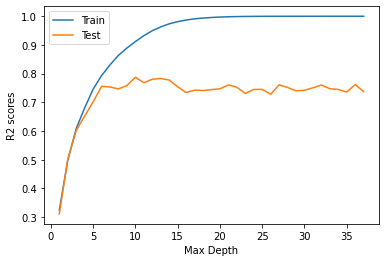

In [ ]:
#plot the scores to visually determine the best max_depth
scores.plot(xlabel='Max Depth', ylabel= 'R2 scores' )

In [ ]:
# sort the dataframe by test scores and save the index (k) of the best score
scores.sort_values(by='Test', ascending=False)


,Train,Test
10,0.911059,0.787042
13,0.962302,0.782771
12,0.948974,0.780149
14,0.972982,0.77727
11,0.931621,0.767776
36,0.999367,0.761878
27,0.999268,0.760598
21,0.99755,0.76038
32,0.999363,0.760196
9,0.888744,0.758092


In [ ]:
# print the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

10

# Fit and Evaluate the best decision tree

In [ ]:
# Create and evaluate a new model with the best depth from the loop above
best_dec = DecisionTreeRegressor(max_depth=best_depth)
best_dec_pipe = make_pipeline(preprocessor, best_dec)
best_dec_pipe.fit(X_train, y_train)

print('Train')
evaluate_regression(y_train, best_dec_pipe.predict(X_train))
print('\nTest')
evaluate_regression(y_test, best_dec_pipe.predict(X_test))

Train
scores: 
MAE: 67,263.74 
MSE: 11,445,533,468.65 
RMSE: 106,983.80 
R2: 0.91

Test
scores: 
MAE: 94,074.12 
MSE: 32,860,191,713.35 
RMSE: 181,273.80 
R2: 0.79


#plot graph to see errors in model


Text(0.5, 0, 'predicted values')

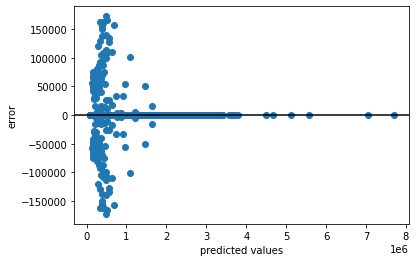

In [ ]:
residual = y_train - train_pred
plt.scatter(train_pred, residual)
plt.axhline(0, color='black')
plt.ylabel('error')
plt.xlabel('predicted values')

# Bonus: Tree Tuning a RandomForest

In [ ]:
# create a range of max_depth values

# create a dataframe to store train and test scores.

# loop over the values in depths

  # Trying depth. Printing depth = n
  # fit a new model with max_depth=n

  # put the model into a pipeline
  
  # fit the model
  
  # create prediction arrays

  
  # evaluate the model using R2 Score

  
  # store the scores in the scores dataframe


In [ ]:
#print scores


In [ ]:
#plot the scores to visually determine the best max_depth


In [ ]:
#sort the dataframe by test scores and save the index max_depth of the best score


In [ ]:
#create and fit a final model using the best value for max_depth


#evaluate the final model